In [1]:
import numpy as np
from scipy.integrate import ode
import matplotlib.pyplot as plt

 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html
 - https://en.wikipedia.org/wiki/Delay_differential_equation

In [2]:
def f(t, y, arg1):
    return [-arg1*y[0]]

In [3]:
def jac(t, y, arg1):
    return [-arg1]

In [4]:
y = [[10]]
t = [0]

In [5]:
t1 = 10
dt = 0.1

In [6]:
r = ode(f, jac).set_integrator('vode')
r.set_initial_value(y[0], t[0]).set_f_params(2.0).set_jac_params(2.0)

In [7]:
while r.successful() and r.t < t1:
    t.append(r.t+dt)
    y.append(r.integrate(r.t+dt))
    
    #print(t[-1], y[-1])

In [8]:
t = np.array(t)
y = np.array(y)

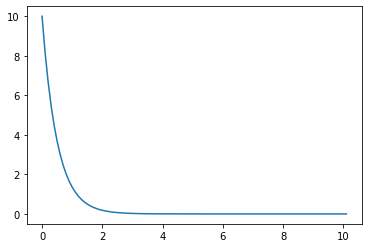

In [11]:
fig, axe = plt.subplots()
axe.plot(t, y)